In [1]:
# 라이브러리
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

import FinanceDataReader as fdr
import seaborn as sns

# 시각화 사용자 설정
from matplotlib import rcParams
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def scale(df, method='minmax') :
    min_max_scaler = MinMaxScaler()
    fitted = min_max_scaler.fit(df)
    output = min_max_scaler.transform(df)
    output = pd.DataFrame(output, columns=df.columns, index=list(df.index.values))
    return output

In [3]:
def graph(df, cols) :
    rcParams['figure.figsize'] = 11.7,8.27
    ax = sns.lineplot(data=df[cols])
    
    plt.title('compare : ' + (', '.join(cols)), fontsize=20)
    plt.ylabel('Value', fontsize=14)
    plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=12, loc='best')
    plt.show()

In [4]:
def decompose(df, type='trend') :
    result = df.copy()
    for col in df.columns :
        output = seasonal_decompose(df[col], model='additive', freq=252)
        if type == 'trend' :
            result[col] = output.trend
        elif type == 'residual' :
            result[col] = output.resid
    return result

In [5]:
# 삼성전자 주가 가져오기
samsung = fdr.DataReader('005930', '2000')
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2000-01-04,6000,6110,5660,6110,1483967,0.148496
2000-01-05,5800,6060,5520,5580,1493604,-0.086743
2000-01-06,5750,5780,5580,5620,1087810,0.007168
2000-01-07,5560,5670,5360,5540,806195,-0.014235
2000-01-10,5600,5770,5580,5770,937615,0.041516
...,...,...,...,...,...,...
2021-01-19,84500,88000,83600,87000,39895044,0.023529
2021-01-20,89000,89000,86500,87200,25211127,0.002299
2021-01-21,87500,88600,86500,88100,25318011,0.010321


In [6]:
df1 = samsung.copy()

df1 = df1[['Volume', 'Change']]

In [7]:
df1

,Volume,Change
Date,,
2000-01-04,1483967,0.148496
2000-01-05,1493604,-0.086743
2000-01-06,1087810,0.007168
2000-01-07,806195,-0.014235
2000-01-10,937615,0.041516
...,...,...
2021-01-19,39895044,0.023529
2021-01-20,25211127,0.002299
2021-01-21,25318011,0.010321


In [8]:
df1_1 = scale(df1[:'2018-01-01'])
df1_2 = scale(df1['2018-01-01':])

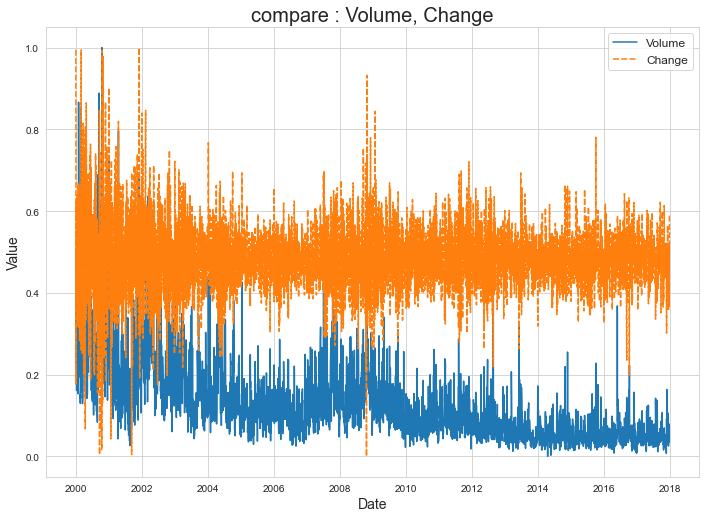

In [9]:
graph(df1_1, list(df1_1.columns))

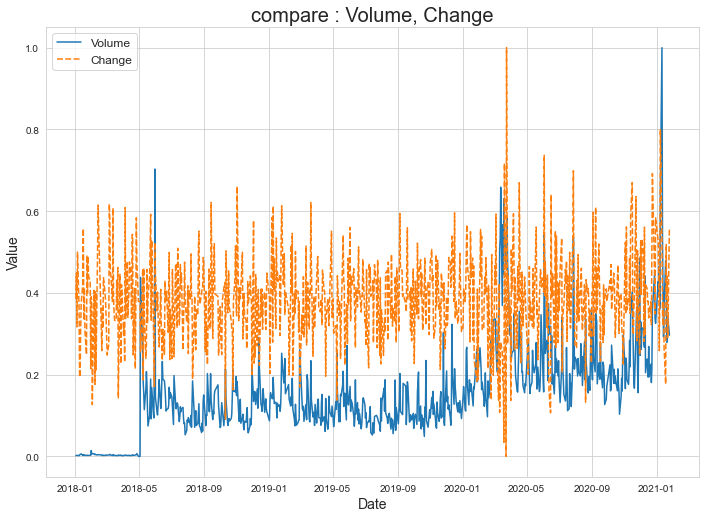

In [10]:
graph(df1_2, list(df1_2.columns))

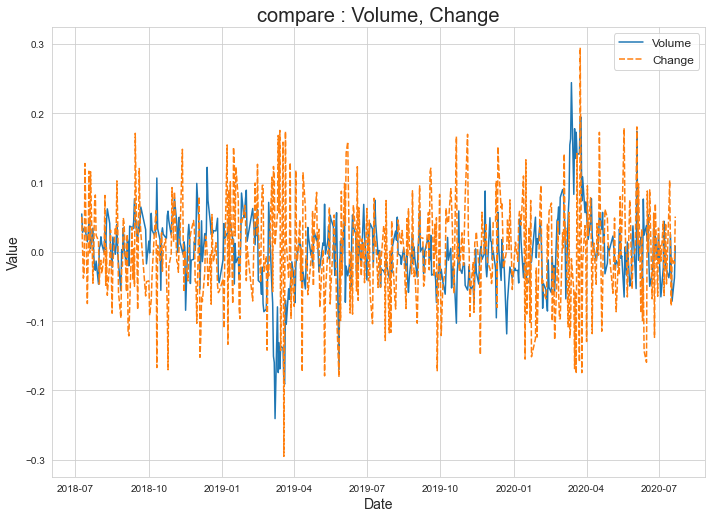

In [11]:
df1_3 = decompose(df1_2, type='residual')
graph(df1_3, list(df1_3.columns))

In [12]:
df2 = samsung.copy()
df2 = df2.drop(['Change'], axis=1)
df2

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-04,6000,6110,5660,6110,1483967
2000-01-05,5800,6060,5520,5580,1493604
2000-01-06,5750,5780,5580,5620,1087810
2000-01-07,5560,5670,5360,5540,806195
2000-01-10,5600,5770,5580,5770,937615
...,...,...,...,...,...
2021-01-19,84500,88000,83600,87000,39895044
2021-01-20,89000,89000,86500,87200,25211127
2021-01-21,87500,88600,86500,88100,25318011


In [13]:
df2_1 = scale(df2[:'2018-01-01'])
df2_2 = scale(df2['2018-01-01':])

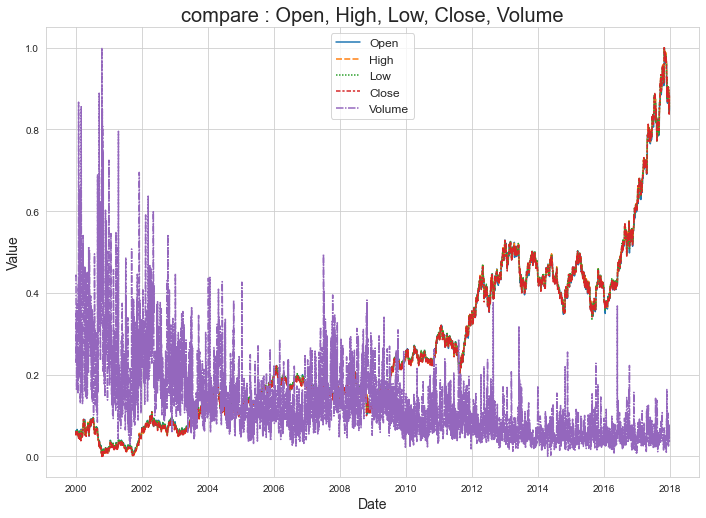

In [14]:
graph(df2_1, list(df2_1.columns))

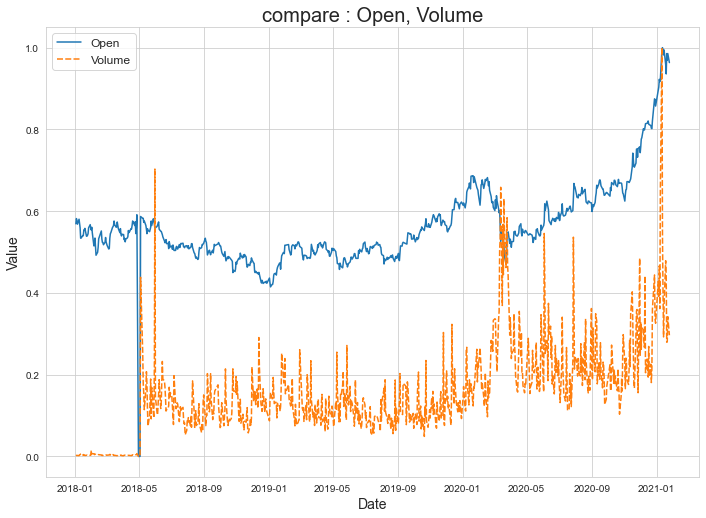

In [15]:
graph(df2_2, list(['Open', 'Volume']))

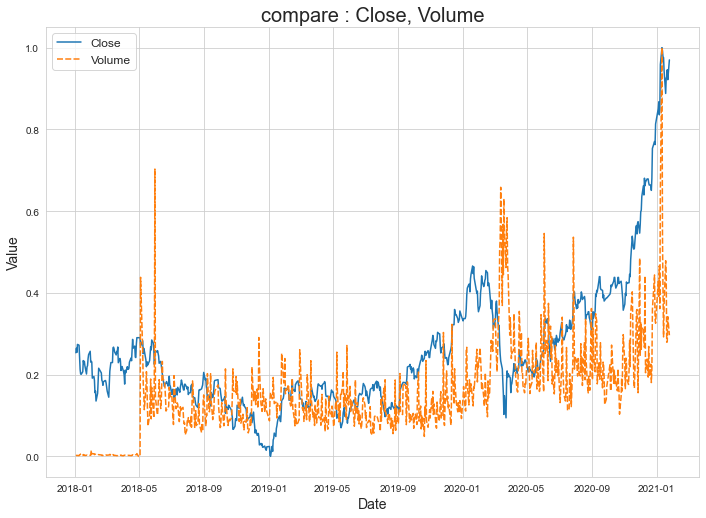

In [16]:
graph(df2_2, list(['Close', 'Volume']))

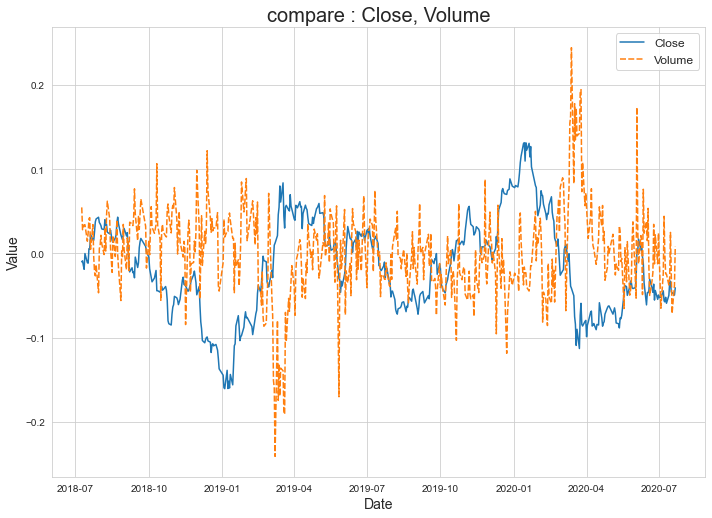

In [17]:
df2_3 = decompose(df2_2, 'residual')
graph(df2_3, list(['Close', 'Volume']))

'''
종가와 거래량의 잔차로 비교했을때 약간 반대되는 양상이 보인다.
'''

In [18]:
stocks = fdr.StockListing('KOSPI')
stocks

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6661,215620,KOSPI,흥국 S&P코리아로우볼,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6663,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
6664,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6665,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [19]:
# 섹터별 그래프 그려보기
# https://finance.daum.net/domestic/sectors

# 1. 운수창고
# 대표종목 : 대한항공, 현대글로비스, 한진칼, CJ대한통운, HMM
s1_dh = fdr.DataReader('003490', '2000')
s1_hd = fdr.DataReader('086280', '2000')
s1_hj = fdr.DataReader('180640', '2000')
s1_cj = fdr.DataReader('000120', '2000')
s1_hmm = fdr.DataReader('011200', '2000')

s1_df = pd.DataFrame(index=s1_dh.index)
s1_df['s1_dh'] = s1_dh.Close
s1_df['s1_hd'] = s1_hd.Close
s1_df['s1_hj'] = s1_hj.Close
s1_df['s1_cj'] = s1_cj.Close
s1_df['s1_hmm'] = s1_hmm.Close
s1_df

,s1_dh,s1_hd,s1_hj,s1_cj,s1_hmm
Date,,,,,
2000-01-04,7488,NaN,NaN,50308.0,42013
2000-01-05,8313,NaN,NaN,51326.0,40238
2000-01-06,7361,NaN,NaN,48475.0,38088
2000-01-07,7614,NaN,NaN,49697.0,38628
2000-01-10,7457,NaN,NaN,48882.0,38837
...,...,...,...,...,...
2021-01-19,24580,189000.0,65200.0,165000.0,14950
2021-01-20,24851,188000.0,65800.0,167000.0,14700
2021-01-21,25627,221000.0,65000.0,169000.0,14950


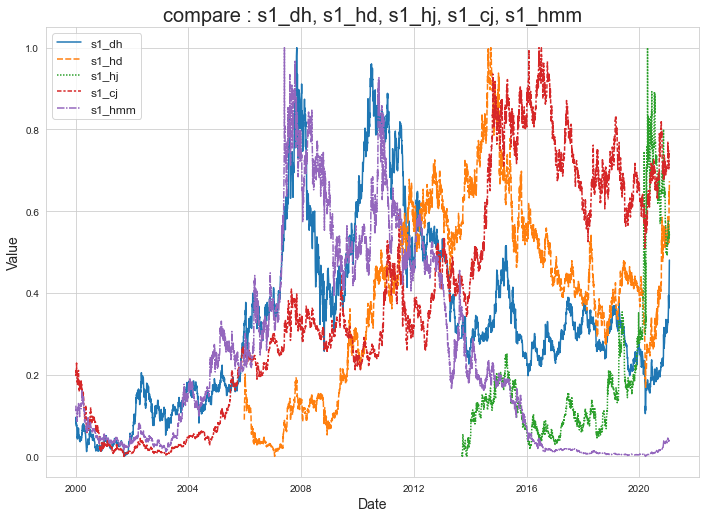

In [22]:
s1_df_scale = scale(s1_df)
graph(s1_df_scale, list(s1_df_scale.columns))

'''
대한항공과 hmm이 비슷한 양상을 보이고,(파랑과 보라)
CJ대한통운과 현대글로비스가 대략 비슷하다
한진칼은 생긴지 얼마 안됐고 급격하게 올라서 분석하기 어렵다
'''

In [23]:
# 2. 통신업
# 대표종목 : SK텔레콤, KT, LG유플러스
s2_sk = fdr.DataReader('017670', '2000')
s2_kt = fdr.DataReader('030200', '2000')
s2_lg = fdr.DataReader('032640', '2000')

s2_df = pd.DataFrame(index=s2_sk.index)
s2_df['s2_sk'] = s2_sk.Close
s2_df['s2_kt'] = s2_kt.Close
s2_df['s2_lg'] = s2_lg.Close

s2_df

,s2_sk,s2_kt,s2_lg
Date,,,
2000-01-04,380000,169000,NaN
2000-01-05,323000,145500,NaN
2000-01-06,328700,147500,NaN
2000-01-07,336000,133000,NaN
2000-01-10,370000,145000,NaN
...,...,...,...
2021-01-19,245000,23700,12050.0
2021-01-20,248500,23750,12000.0
2021-01-21,256000,23900,12250.0


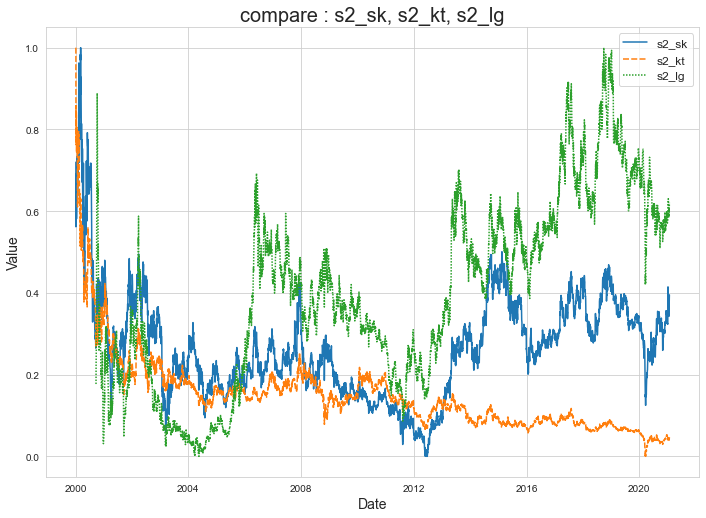

In [24]:
s2_df_scale = scale(s2_df)
graph(s2_df_scale, list(s2_df_scale.columns))
'''
sk와 lg가 비슷하며 kt는 계속 감소 추세
'''

In [25]:
# 3. 음식료품
# 대표종목 : CJ제일제당, 오리온, 오뚜기, 농심
s3_cj = fdr.DataReader('097950', '2000')
s3_or = fdr.DataReader('271560', '2000')
s3_ot = fdr.DataReader('007310', '2000')
s3_ns = fdr.DataReader('004370', '2000')

s3_df = pd.DataFrame(index=s3_cj.index)
s3_df['s3_cj'] = s3_cj.Close
s3_df['s3_or'] = s3_or.Close
s3_df['s3_ot'] = s3_ot.Close
s3_df['s3_ns'] = s3_ns.Close

s3_df

,s3_cj,s3_or,s3_ot,s3_ns
Date,,,,
2007-09-28,230000,NaN,165000,225500
2007-10-01,220000,NaN,167000,228500
2007-10-02,245000,NaN,169500,226500
2007-10-04,255000,NaN,171000,227500
2007-10-05,252500,NaN,167500,219500
...,...,...,...,...
2021-01-19,437000,120500.0,561000,292000
2021-01-20,433500,120000.0,561000,291500
2021-01-21,441000,120500.0,565000,291000


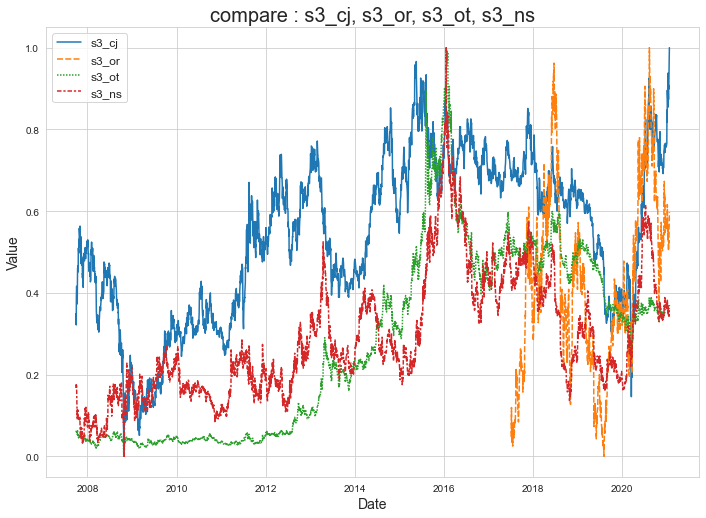

'\n\n'

In [26]:
s3_df_scale = scale(s3_df)
graph(s3_df_scale, list(s3_df_scale.columns))
'''
오리온을 제외하고 다 비슷하며 최근에 많이 올랐다
농심, 오뚜기는 상당히 비슷
'''

In [27]:
# 4. 전기전자
# 대표종목 : 삼성전자, sk하이닉스, LG이노텍
s4_ss = fdr.DataReader('005930', '2000')
s4_sk = fdr.DataReader('000660', '2000')
s4_lg = fdr.DataReader('011070', '2000')

s4_df = pd.DataFrame(index=s4_ss.index)
s4_df['s4_ss'] = s4_ss.Close
s4_df['s4_sk'] = s4_sk.Close
s4_df['s4_lg'] = s4_lg.Close

s4_df

,s4_ss,s4_sk,s4_lg
Date,,,
2000-01-04,6110,505462,NaN
2000-01-05,5580,453444,NaN
2000-01-06,5620,429888,NaN
2000-01-07,5540,425962,NaN
2000-01-10,5770,422037,NaN
...,...,...,...
2021-01-19,87000,130500,188500.0
2021-01-20,87200,130500,205000.0
2021-01-21,88100,131500,205500.0


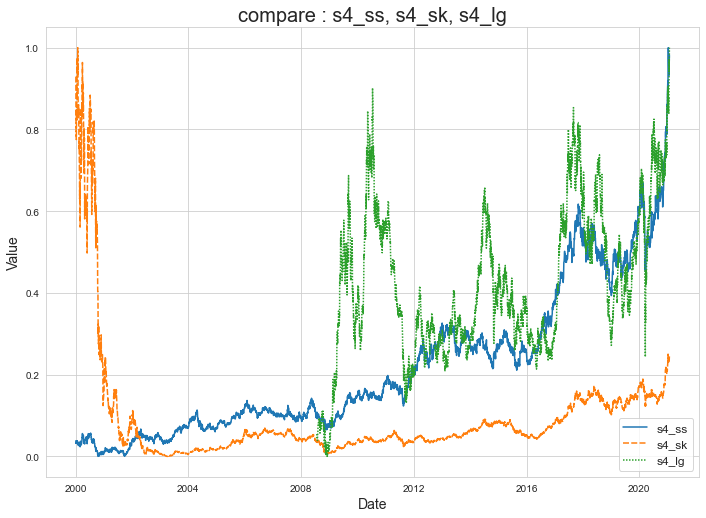

'\n\n'

In [28]:
s4_df_scale = scale(s4_df)
graph(s4_df_scale, list(s4_df_scale.columns))
'''
셋 다 꾸준히 우상향 하고 있다
'''

In [29]:
# 5. 화학
# 대표종목 : LG생활건강, 아모레퍼시픽, SK이노베이션
s5_lg = fdr.DataReader('051900', '2000')
s5_am = fdr.DataReader('090430', '2000')
s5_sk = fdr.DataReader('096770', '2000')

s5_df = pd.DataFrame(index=s5_lg.index)
s5_df['s5_lg'] = s5_lg.Close
s5_df['s5_am'] = s5_am.Close
s5_df['s5_sk'] = s5_sk.Close

s5_df

,s5_lg,s5_am,s5_sk
Date,,,
2001-04-25,13650,NaN,NaN
2001-04-26,15650,NaN,NaN
2001-04-27,17950,NaN,NaN
2001-04-30,18000,NaN,NaN
2001-05-02,20700,NaN,NaN
...,...,...,...
2021-01-19,1551000,223000.0,270000.0
2021-01-20,1554000,229500.0,274500.0
2021-01-21,1545000,231500.0,276000.0


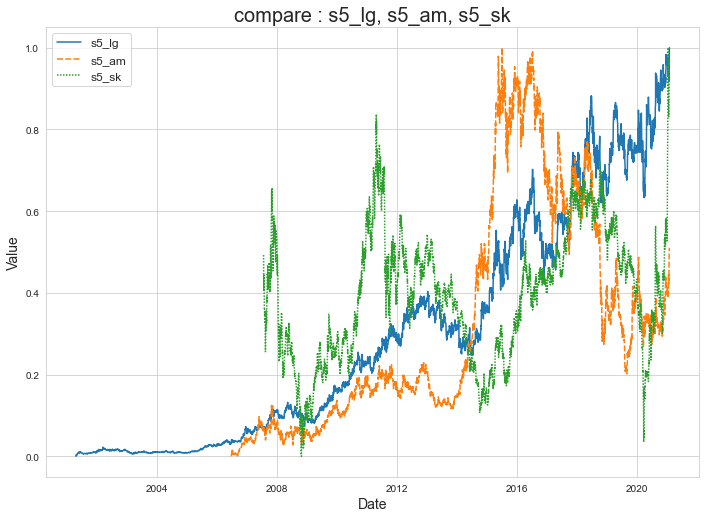

'\n\n'

In [30]:
s5_df_scale = scale(s5_df)
graph(s5_df_scale, list(s5_df_scale.columns))
'''
LG생활건강이 꾸준히 우상향하고 있다
'''

In [31]:
# 6. 운수장비
# 대표종목 : 기아차, 한국조선해양, 현대차, 삼성중공업
s6_ka = fdr.DataReader('000270', '2000')
s6_hj = fdr.DataReader('009540', '2000')
s6_hd = fdr.DataReader('005380', '2000')
s6_ss = fdr.DataReader('010140', '2000')

s6_df = pd.DataFrame(index=s6_ka.index)
s6_df['s6_ka'] = s6_ka.Close
s6_df['s6_hj'] = s6_hj.Close
s6_df['s6_hd'] = s6_hd.Close
s6_df['s6_ss'] = s6_ss.Close

s6_df

,s6_ka,s6_hj,s6_hd,s6_ss
Date,,,,
2000-01-04,7350,39516,20700,4358
2000-01-05,6950,39335,20800,4320
2000-01-06,6650,37245,19700,4236
2000-01-07,6500,36245,20300,4243
2000-01-10,6800,36337,20000,4182
...,...,...,...,...
2021-01-19,83400,110500,261500,6850
2021-01-20,87600,107500,259000,6810
2021-01-21,91100,108000,264500,6860


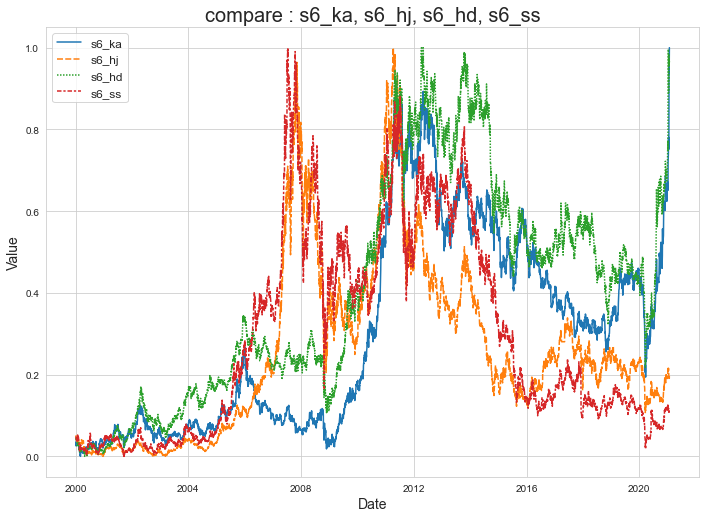

'\n\n'

In [32]:
s6_df_scale = scale(s6_df)
graph(s6_df_scale, list(s6_df_scale.columns))
'''
대체로 비슷한 양상을 보이지만
한국조선해양, 삼성중공업(주황, 빨강)
기아차, 현대차(파랑, 초록) 이 비슷하다
'''

In [33]:
# 7. 금융업
# 대표종목 : 삼성생명, 미래에셋대우, 신한지주, kb금융, 하나금융지주
s7_ss = fdr.DataReader('032830', '2000')
s7_dw = fdr.DataReader('006800', '2000')
s7_sh = fdr.DataReader('055550', '2000')
s7_kb = fdr.DataReader('105560', '2000')
s7_hn = fdr.DataReader('086790', '2000')

s7_df = pd.DataFrame(index=s7_ss.index)
s7_df['s7_ss'] = s7_ss.Close
s7_df['s7_dw'] = s7_dw.Close
s7_df['s7_sh'] = s7_sh.Close
s7_df['s7_kb'] = s7_kb.Close
s7_df['s7_hn'] = s7_hn.Close

s7_df

,s7_ss,s7_dw,s7_sh,s7_kb,s7_hn
Date,,,,,
2010-05-12,114000,17378,43350,49000,31950
2010-05-13,115500,17820,45100,51200,32100
2010-05-14,114000,18571,44650,50600,31200
2010-05-17,107500,18306,43600,47950,29900
2010-05-18,110000,17909,43400,48700,30250
...,...,...,...,...,...
2021-01-19,79600,10000,33050,45200,38250
2021-01-20,78200,9880,33100,45150,37250
2021-01-21,78900,9870,33350,44750,37150


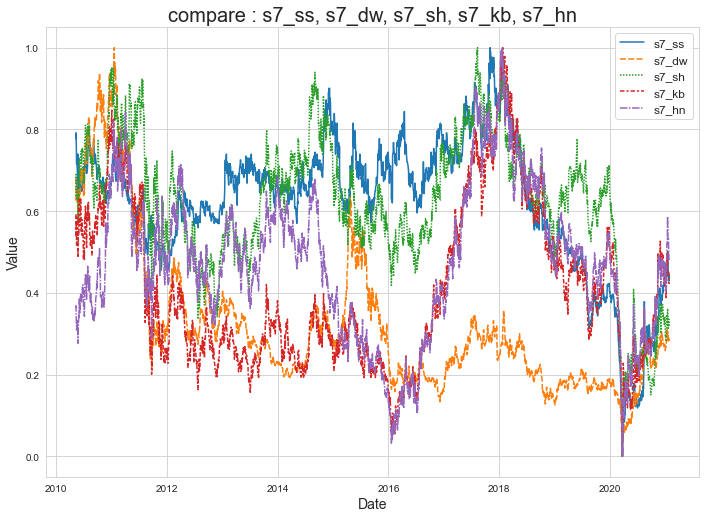

'\n\n'

In [34]:
s7_df_scale = scale(s7_df)
graph(s7_df_scale, list(s7_df_scale.columns))
'''
최근에 모두 비슷한 양상을 보이고 있다
'''

In [35]:
# 8. 의약품
# 대표종목 : 셀트리온, 삼성바이오로직스, 녹십자
s8_ct = fdr.DataReader('068270', '2000')
s8_ss = fdr.DataReader('207940', '2000')
s8_ns = fdr.DataReader('006280', '2000')

s8_df = pd.DataFrame(index=s8_ct.index)
s8_df['s8_ct'] = s8_ct.Close
s8_df['s8_ss'] = s8_ss.Close
s8_df['s8_ns'] = s8_ns.Close

s8_df

,s8_ct,s8_ss,s8_ns
Date,,,
2005-07-19,6185,NaN,32455
2005-07-20,5259,NaN,32547
2005-07-21,4609,NaN,32455
2005-07-22,4481,NaN,32915
2005-07-25,4539,NaN,33101
...,...,...,...
2021-01-19,312500,796000.0,419000
2021-01-20,311000,795000.0,415500
2021-01-21,312000,796000.0,406500


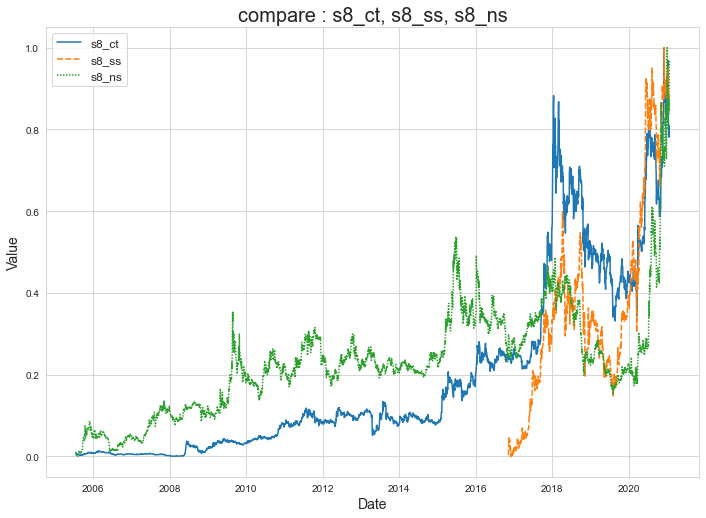

'\n\n'

In [36]:
s8_df_scale = scale(s8_df)
graph(s8_df_scale, list(s8_df_scale.columns))
'''
모두 비슷하고 우상향하는 그래프를 그리고 있다
'''

In [37]:
# 9. 의료정밀 - 종목 수도 적고 시가총액이 높은 주식이 없음
# 대표종목 : 케이씨텍, 덴티움
s9_kc = fdr.DataReader('281820', '2000')
s9_dt = fdr.DataReader('145720', '2000')

s9_df = pd.DataFrame(index=s9_kc.index)
s9_df['s9_kc'] = s9_kc.Close
s9_df['s9_dt'] = s9_dt.Close

s9_df

,s9_kc,s9_dt
Date,,
2017-12-05,22700,61900
2017-12-06,23200,61200
2017-12-07,24400,59200
2017-12-08,23000,58800
2017-12-11,22000,63000
...,...,...
2021-01-19,28600,45500
2021-01-20,29700,47750
2021-01-21,29750,47850


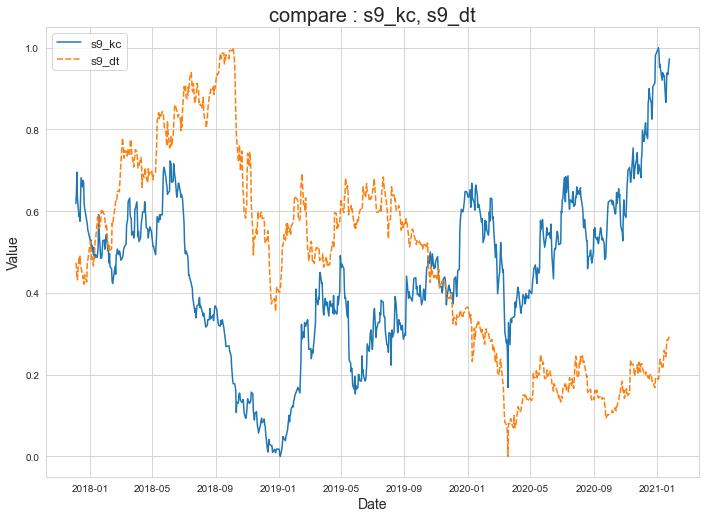

'\n\n'

In [38]:
s9_df_scale = scale(s9_df)
graph(s9_df_scale, list(s9_df_scale.columns))
'''
이친구들 괜찮아 보인다..
'''

In [41]:
# 10. 서비스업
# 대표종목 : 카카오, naver, 엔씨소프트
s10_kk = fdr.DataReader('035720', '2000')
s10_nv = fdr.DataReader('035420', '2000')
s10_nc = fdr.DataReader('036570', '2000')

s10_df = pd.DataFrame(index=s10_kk.index)
s10_df['s10_kk'] = s10_kk.Close
s10_df['s10_nv'] = s10_nv.Close
s10_df['s10_nc'] = s10_nc.Close

s10_df

,s10_kk,s10_nv,s10_nc
Date,,,
2000-01-04,151373,NaN,NaN
2000-01-05,133368,NaN,NaN
2000-01-06,117364,NaN,NaN
2000-01-07,103360,NaN,NaN
2000-01-10,104472,NaN,NaN
...,...,...,...
2021-01-19,440000,308000.0,957000.0
2021-01-20,444000,308000.0,965000.0
2021-01-21,454000,322500.0,970000.0


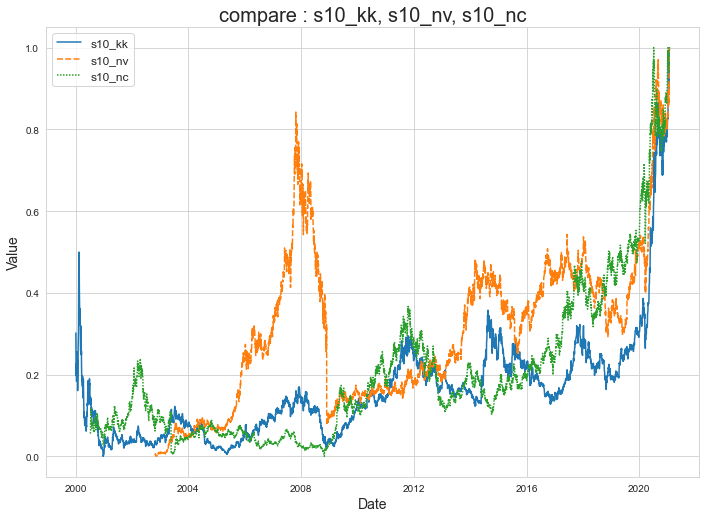

'\n\n'

In [42]:
s10_df_scale = scale(s10_df)
graph(s10_df_scale, list(s10_df_scale.columns))
'''
그냥 요즘은 주식이 다 오르는것 같다
'''

In [ ]:
# 11. 증권
# 대표종목 : 
s11_ = fdr.DataReader('', '2000')

s11_df = pd.DataFrame(index=.index)
s11_df[''] = .Close

s11_df

In [ ]:
s11_df_scale = scale(s11_df)
graph(s11_df_scale, list(s11_df_scale.columns))
'''

'''

In [ ]:
# 12. 보험
# 대표종목 : 
s12_ = fdr.DataReader('', '2000')

s12_df = pd.DataFrame(index=.index)
s12_df[''] = .Close

s12_df

In [ ]:
s12_df_scale = scale(s12_df)
graph(s12_df_scale, list(s12_df_scale.columns))
'''

'''

In [ ]:
# 13. 철강금속
# 대표종목 : 
s13_ = fdr.DataReader('', '2000')

s13_df = pd.DataFrame(index=.index)
s13_df[''] = .Close

s13_df

In [ ]:
s13_df_scale = scale(s13_df)
graph(s13_df_scale, list(s13_df_scale.columns))
'''

'''

In [ ]:
# 14. 유통업
# 대표종목 : 
s14_ = fdr.DataReader('', '2000')

s14_df = pd.DataFrame(index=.index)
s14_df[''] = .Close

s14_df

In [ ]:
s14_df_scale = scale(s14_df)
graph(s14_df_scale, list(s14_df_scale.columns))
'''

'''

In [ ]:
# 15. 전기가스업
# 대표종목 : 
s15_ = fdr.DataReader('', '2000')

s15_df = pd.DataFrame(index=.index)
s15_df[''] = .Close

s15_df

In [ ]:
s15_df_scale = scale(s15_df)
graph(s15_df_scale, list(s15_df_scale.columns))
'''

'''

In [ ]:
# 16. 섬유의복
# 대표종목 : 
s16_ = fdr.DataReader('', '2000')

s16_df = pd.DataFrame(index=.index)
s16_df[''] = .Close

s16_df

In [ ]:
s16_df_scale = scale(s16_df)
graph(s16_df_scale, list(s16_df_scale.columns))
'''

'''

In [ ]:
# 17. 비금속광물
# 대표종목 : 
s17_ = fdr.DataReader('', '2000')

s17_df = pd.DataFrame(index=.index)
s17_df[''] = .Close

s17_df

In [ ]:
s17_df_scale = scale(s17_df)
graph(s17_df_scale, list(s17_df_scale.columns))
'''

'''

In [ ]:
# 18. 종이목재
# 대표종목 : 
s17_ = fdr.DataReader('', '2000')

s18_df = pd.DataFrame(index=.index)
s18_df[''] = .Close

s18_df

In [ ]:
s18_df_scale = scale(s18_df)
graph(s18_df_scale, list(s18_df_scale.columns))
'''

'''

In [ ]:
# 19. 건설업
# 대표종목 : 
s19_ = fdr.DataReader('', '2000')

s19_df = pd.DataFrame(index=.index)
s19_df[''] = .Close

s19_df

In [ ]:
s19_df_scale = scale(s19_df)
graph(s19_df_scale, list(s19_df_scale.columns))
'''

'''

In [ ]:
# 20. 기계
# 대표종목 : 
s20_ = fdr.DataReader('', '2000')

s20_df = pd.DataFrame(index=.index)
s20_df[''] = .Close

s20_df

In [ ]:
s20_df_scale = scale(s20_df)
graph(s20_df_scale, list(s20_df_scale.columns))
'''

'''

In [ ]:
# 21. 은행
# 대표종목 : 
s21_ = fdr.DataReader('', '2000')

s21_df = pd.DataFrame(index=.index)
s21_df[''] = .Close

s21_df

In [ ]:
s21_df_scale = scale(s21_df)
graph(s21_df_scale, list(s21_df_scale.columns))
'''

'''